<a href="https://colab.research.google.com/github/data2450/ANN-MODELS/blob/main/digit_classification_Tensorflow_Keras_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Open Source Deep Learning Frameworks

Deep learnings is made accessible by a number of open source projects. Some of the most popular technologies include, but are not limited to, Deeplearning4j (DL4j), Theano, Torch, TensorFlow, and Caffe. The deciding factors on which one to use are the tech stack they target, and if they are low-level, academic, or application focused. Here’s an overview of each:

DL4J:

   * JVM-based
   * Distrubted
   * Integrates with Hadoop and Spark
   
   
Theano:

   * Very popular in Academia
   * Fairly low level
   * Interfaced with via Python and Numpy


Torch:

   * Lua based
   * In house versions used by Facebook and Twitter
   * Contains pretrained models


TensorFlow:

   * Google written successor to Theano
   * Interfaced with via Python and Numpy
   * Highly parallel
   * Can be somewhat slow for certain problem sets



Caffe:

   * Not general purpose. Focuses on machine-vision problems
   * Implemented in C++ and is very fast
   * Not easily extensible
   * Has a Python interface

## Brief installation of Tensorflow

>TensorFlow is tested and supported on the following 64-bit systems:

>1.Ubuntu 16.04 or later

>2.Windows 7 or later

>3.macOS 10.12.6 (Sierra) or later (no GPU support)

>4.Raspbian 9.0 or later

> **pip install tensorflow==2.0.0**

> To run from Anaconda Prompt

> **!pip install tensorflow==2.0.0**

> To run from Jupyter Notebook

`Both Tensorflow 2.0 and Keras have been released for four years (Keras was released in March 2015, and Tensorflow was released in November of the same year). The rapid development of deep learning in the past days, we also know some problems of Tensorflow1.x and Keras:`

* Using Tensorflow means programming static graphs, which is difficult and inconvenient for programs that are familiar with imperative programming

* Tensorflow api is powerful and flexible, but it is more complex, confusing and difficult to use.

* Keras api is productive and easy to use, but lacks flexibility for research


#### Official docs link for [DETAILED INSTALLATION STEPS](https://www.tensorflow.org/install) for Tensorflow 2

In [ ]:
# Verify installation - 
import tensorflow as tf

In [ ]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.3.0
Keras Version: 2.4.0


`Tensorflow2.0 is a combination design of Tensorflow1.x and Keras. Considering user feedback and framework development over the past four years, it largely solves the above problems and will become the future machine learning platform.`

> Tensorflow 2.0 is built on the following core ideas:


* The coding is more pythonic, so that users can get the results immediately like they are programming in numpy
* Retaining the characteristics of static graphs (for performance, distributed, and production deployment), this makes TensorFlow fast, scalable, and ready for production.
* Using Keras as a high-level API for deep learning, making Tensorflow easy to use and efficient
* Make the entire framework both high-level features (easy to use, efficient, and not flexible) and low-level features (powerful and scalable, not easy to use, but very flexible)

>Eager execution is by default in TensorFlow 2.0 and, it needs no special setup.
>The following below code can be used to find out whether a CPU or GPU is in use

### GPU/CPU Check

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## A simple classifier using Keras's Sequential API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [ ]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape)

(60000, 28, 28)


In [ ]:
print(X_test.shape)

(10000, 28, 28)


In [ ]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [ ]:
 #X_train_full[:5000]

In [ ]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
#X_valid1, X_train1 = X_train_full[:70000] / 255., X_train_full[70000:] / 255.

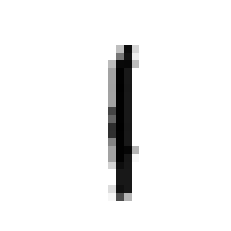

In [ ]:
# lets view the first data point of X_train
plt.imshow(X_train[9000], cmap="binary")
plt.axis('off')
plt.show()


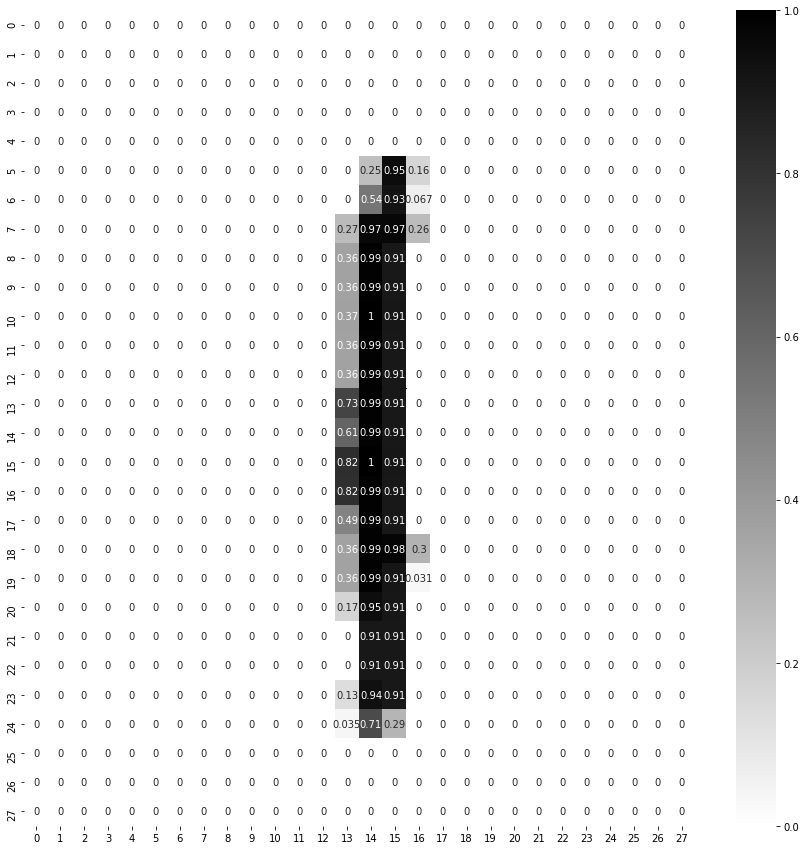

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[9000], annot=True, cmap="binary")

In [ ]:
# actual value of y_train
y_train.shape

(55000,)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
from keras.layers import LeakyReLU
LAYERS1 = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation=LeakyReLU(alpha=0.1), name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation=LeakyReLU(alpha=0.1), name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf1 = tf.keras.models.Sequential(LAYERS1)

In [ ]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [ ]:
model_clf1.layers

In [ ]:
model_clf1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [ ]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [ ]:
type(hidden1.get_weights())

list

In [ ]:
hidden1.get_weights()

[array([[ 0.03132741, -0.0505063 , -0.01847944, ...,  0.06696217,
         -0.04154571,  0.03933822],
        [ 0.01442739,  0.05554807, -0.05303113, ...,  0.06200977,
         -0.03921845,  0.02426083],
        [-0.00457103, -0.04704231, -0.06838319, ..., -0.01691865,
          0.01797654, -0.02243904],
        ...,
        [ 0.02589051,  0.02933437, -0.03269443, ..., -0.03818607,
         -0.07168148, -0.03225696],
        [ 0.00174455, -0.02840123,  0.04683785, ...,  0.00147744,
         -0.03165198, -0.05092396],
        [ 0.02906791,  0.01486132,  0.05728674, ..., -0.04173332,
         -0.00251146,  0.01443817]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
hidden1.get_weights()

[array([[-0.05899623,  0.04762314,  0.01957688, ...,  0.00673641,
         -0.01666502, -0.05204024],
        [-0.00666799, -0.06786868, -0.04556734, ..., -0.03918093,
         -0.06101357,  0.00691104],
        [ 0.02960858,  0.03865369, -0.06505131, ...,  0.02512713,
         -0.05745339, -0.07183953],
        ...,
        [ 0.00016908, -0.02166972,  0.01929994, ...,  0.01478533,
          0.04725701,  0.02744862],
        [ 0.01205099, -0.00974793,  0.04157955, ..., -0.0036861 ,
         -0.04081022, -0.0147295 ],
        [ 0.0132997 ,  0.00509638, -0.06695579, ..., -0.04392944,
          0.03726628,  0.00897216]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[ 0.05527915, -0.0253571 ,  0.0714597 , ...,  0.05772354,
         0.04435049, -0.04324796],
       [-0.05598519, -0.03452805, -0.01008829, ...,  0.00309719,
         0.02428363, -0.0064479 ],
       [ 0.01310906,  0.01277141, -0.0351422 , ...,  0.01785957,
        -0.00317187, -0.01092099],
       ...,
       [ 0.07104574, -0.04415555,  0.05640016, ...,  0.02159248,
         0.01075073, -0.05676652],
       [ 0.04256755,  0.04726544,  0.03346547, ..., -0.04917888,
         0.05683219, -0.00711196],
       [-0.04437057, -0.04838938, -0.02932303, ..., -0.03043151,
         0.00548614,  0.03575181]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=opt,#or OPTIMIZER
              metrics=METRICS)



In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf1.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [ ]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

In [ ]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)
#1719 bachsize

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0550 - accuracy: 0.9854 - val_loss: 0.2959 - val_accuracy: 0.9690
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9872 - val_loss: 0.2898 - val_accuracy: 0.9708
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.2836 - val_accuracy: 0.9706
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.2817 - val_accuracy: 0.9708
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0386 - accuracy: 0.9891 - val_loss: 0.2788 - val_accuracy: 0.9716
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9895 - val_loss: 0.2708 - val_accuracy: 0.9712
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.2751 - val_accuracy:

In [ ]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)
#1719 bachsize

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6165 - accuracy: 0.8408 - val_loss: 0.3060 - val_accuracy: 0.9172
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2862 - accuracy: 0.9188 - val_loss: 0.2403 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2337 - accuracy: 0.9334 - val_loss: 0.2055 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1998 - accuracy: 0.9429 - val_loss: 0.1788 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1741 - accuracy: 0.9503 - val_loss: 0.1703 - val_accuracy: 0.9516
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1547 - accuracy: 0.9556 - val_loss: 0.1463 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1385 - accuracy: 0.9599 - val_loss: 0.1379 - val_accuracy:

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.054987,0.985400,0.295935,0.9690
1,0.047729,0.987164,0.289757,0.9708
2,0.043377,0.988491,0.283615,0.9706
3,0.040781,0.988800,0.281730,0.9708
4,0.038565,0.989109,0.278798,0.9716
5,0.036508,0.989527,0.270835,0.9712
6,0.035206,0.989673,0.275133,0.9714
7,0.034074,0.990000,0.271424,0.9724
8,0.033094,0.990236,0.267124,0.9726
9,0.032414,0.990255,0.260336,0.9718


In [ ]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [ ]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2020_11_22_05_15_22_.h5


In [ ]:
history.params
#

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.612757,0.843855,0.307818,0.9154
1,0.283996,0.920145,0.231338,0.9356
2,0.231923,0.934509,0.206434,0.9448
3,0.197233,0.943418,0.178992,0.9500
4,0.171791,0.951073,0.160042,0.9592
5,0.152289,0.956745,0.146094,0.9618
6,0.136264,0.960891,0.134972,0.9642
7,0.123189,0.964655,0.123193,0.9678
8,0.111919,0.968436,0.118060,0.9672
9,0.102395,0.970945,0.109697,0.9710


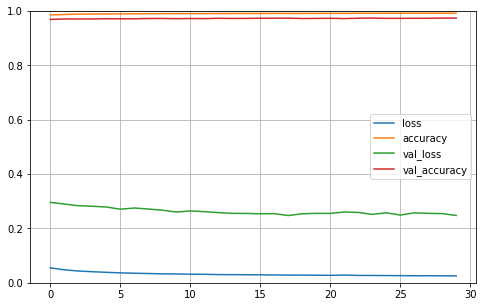

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9795


[0.06926323473453522, 0.9794999957084656]

In [ ]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

In [ ]:
y_test_new = y_test[:3]

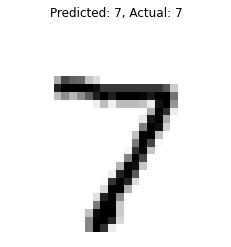

------------------------------------------------------------


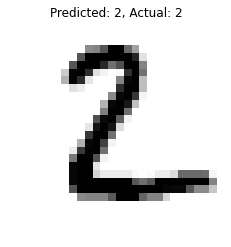

------------------------------------------------------------


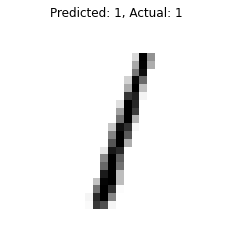

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [ ]:
X_new1 = X_test[:8]

In [ ]:
y_test_new1 = y_test[:8]

In [ ]:
y_pred1 = np.argmax(model_clf.predict(X_new1), axis=-1)
y_pred1

array([7, 2, 1, 0, 4, 1, 4, 9])

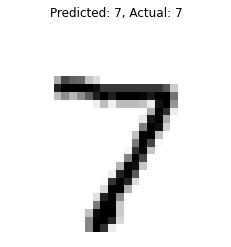

------------------------------------------------------------


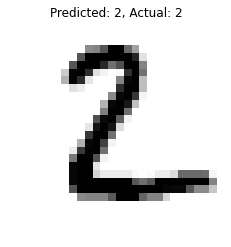

------------------------------------------------------------


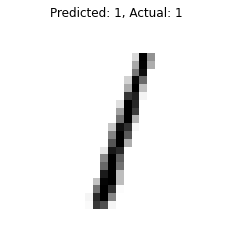

------------------------------------------------------------


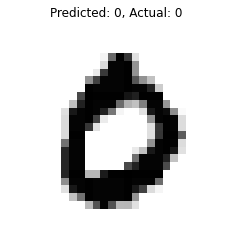

------------------------------------------------------------


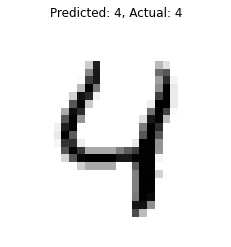

------------------------------------------------------------


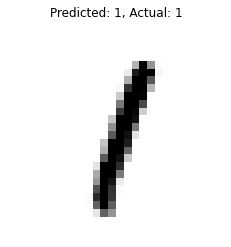

------------------------------------------------------------


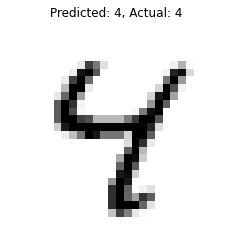

------------------------------------------------------------


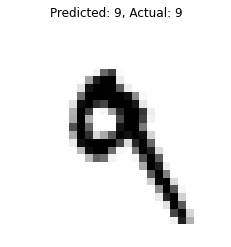

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new1, y_pred1, y_test_new1):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>